# Introduction

So, Today we are going to work on a new project called Breast Cancer Prediction using scikit-learn various models and calulate the accuracy of best model.
A cancer that forms in the cells of the breasts.

Breast cancer can occur in women and rarely in men.

Symptoms of breast cancer include a lump in the breast, bloody discharge from the nipple and changes in the shape or texture of the nipple or breast.

Its treatment depends on the stage of cancer. It may consist of chemotherapy, radiation, hormone therapy and surgery.

A tumor is an abnormal lump or growth of cells. When the cells in the tumor are normal, it is benign. Something just went wrong, and they overgrew and produced a lump. When the cells are abnormal and can grow uncontrollably, they are cancerous cells, and the tumor is malignant.

## Dataset
Based on whether the tumor is Benign or malignant there is a dataset readily available in the sklearn model and we are going to deal with it to train various scikit-learn models
OR
Alternatively, we can download the dataset from the kaggle <a href="https://www.kaggle.com/uciml/breast-cancer-wisconsin-data" target="">BREAST CANCER PREDICTION DATASET</a>

First of all load the model from the sklearn and also numpy for various numerical computation

## Loading Dataset

In [1]:
#importing warnings for ignoring warning
import warnings
warnings.filterwarnings('ignore')
# importing numoy for numerical operations
import numpy as np
#importing pandas for loading dataset
import pandas as pd
#importing seaborn for visualization
import seaborn as sns
# importing dataset from sklearn
import sklearn.datasets as data

Now, load the breast cancer data from various avaliable datasets in sklearn 

In [2]:
# initializing breast_cancer dataset
breast_cancer=data.load_breast_cancer()

Take a look at the data by print attribute

In [3]:
# taking a look at the data
print(breast_cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

The data is in the form of dictionary format with various values in the *features_names* which are nothing but the independent variables columns and their values are in the *data* and the *target_names* is nothing but the target or dependent variables columns which is having two values in it i.e. 'malignant' and 'benign' and their values are in *target* 

Let us divide the dependent variables in X and independent variable in Y.

In [4]:
# Divinding features and target columns

# feature data
X=breast_cancer.data

# target data
Y=breast_cancer.target

Taking a glance at the data after division

In [5]:
# printing feature data
print(X)

# printing target data
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

Checking the shape of the data by shape attribute

In [6]:
# shape of the data
print(X.shape,Y.shape)
# So, the X has 30 columns which means 30 features and 
# Y has 1 column in which two values bengin and malignant and both has 569 rows.

(569, 30) (569,)


Now, Since the data is in dictionary form we can easily transform this into dataframe by pandas

# Analyzing the data

In [7]:
# importing pandas
import pandas as pd

After importing pandas we can convert data into dataframe attribute in which we will pass the X varible first and the respective columns name which is in featue_names

In [8]:
# tranform data into dataframe
df= pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

Then, we will add the target variable in a new column called class

In [9]:
# adding target column
df['class']=breast_cancer.target

In [10]:
# printing first 4 rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


So data is loaded into dataframe and there are 30 columns that means 30 features in the dataframe.

Taking a glance at the dataset by pandas head attribute

Or, you can download the dataset from the Kaggle (see the INTRODUCTION-DATASETS) and upload it in the same folder as our .ipynb file for only our convinience

`Note- In Kaggle Dataset, at the target columns 0 means 'malignant' and 1 means 'benign'`

Lets see the other info about the data such as null values and statistics of the data

In [11]:
#info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [12]:
#checking if there is any null values present
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
class                      0
dtype: int64

The dataset is in good shape and there is no null value present in the data. Lets see the number of target values present in the data

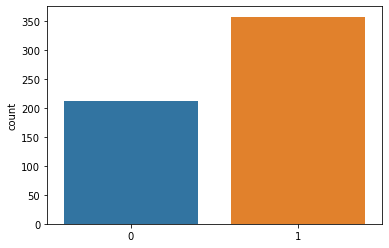

In [13]:
#visualizing the target data
sns.countplot(breast_cancer.target);

So there are more values of benign than malign present in the target

Loading the dataset from the downloaded dataset file using and read it using read_csv attribute in pandas

In [14]:
# loading the dataset
df.to_csv('breast_cancer_prediction.csv',index=False)

Seeing the statistical describtion of the data by describe attribute

In [15]:
# statistical analysis
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Counting the values in the target column i.e. class column by using value_counts attribute

In [16]:
# counting the values in class
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

Cross checking the target values available 

In [17]:
# printing the target names 
print(breast_cancer.target_names)

['malignant' 'benign']


Looking at the impact of the targets on various dependent variable by grouping by the target class and then taking a mean of that group and finally printing the data

In [18]:
# grouping the class column and taking the mean
class_group=df.groupby('class').mean()

# printing the class_group
print(class_group) 

       mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
class                                                                           
0        17.462830     21.604906      115.365377  978.376415         0.102898   
1        12.146524     17.914762       78.075406  462.790196         0.092478   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
class                                                                         
0              0.145188        0.160775             0.087990       0.192909   
1              0.080085        0.046058             0.025717       0.174186   

       mean fractal dimension  ...  worst radius  worst texture  \
class                          ...                                
0                    0.062680  ...     21.134811      29.318208   
1                    0.062867  ...     13.379801      23.515070   

       worst perimeter   worst area  worst smoothness  worst compactness  \
class        

It is seen from the above table that malignant has higher values than benign which is obvious because 1-benign tumor can be cured while 0-malignant tumor is somewhat danger.

Now, after analyzing we will split the data and then train it with various scikit-learn models

# Train-Test Split

Splitting the data into train and test data for training and testing the models

In [19]:
# importing train-test split from sklearn
from sklearn.model_selection import train_test_split as tsp

In [20]:
# splitting the data into train and test
x_train,x_test,y_train,y_test=tsp(X,Y,test_size=0.1)

Now, we will see that the target data is uniformly split in train and test by checking each data mean by using mean attribute

In [21]:
# mean of original data
print(Y.mean())

# mean of train data
print(y_train.mean())

# mean of test data
print(y_test.mean())

0.6274165202108963
0.630859375
0.5964912280701754


It is been observed that the mean shows large variation for the 3 forms of data.

So, we will use the stratify attribute to split the data into equal uniformity

In [22]:
# again splitting the data by using stratify attribute
x_train,x_test,y_train,y_test=tsp(X,Y,test_size=0.1,stratify=Y,random_state=1)

We can cross check the uniformity by again checking the mean of 3 forms of data.

In [23]:
# mean of original data
print(Y.mean())

# mean of train data
print(y_train.mean())

# mean of test data
print(y_test.mean())

0.6274165202108963
0.626953125
0.631578947368421


Finally importing standard scaler for standardizing the x_train value for the model to be a better fit

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

So, now the data is uniformly distributed in train and test for target variable and standardized properly.

And we are ready to train our models

We will train our models in five models-
* Logistic Regression
* K-Nearest Neighbours
* Decision tree Classifier
* Random Forest Classifier 
* Support Vector Classifier

And then check the accuracy for both the models for training and testing data to give the best model for predicting

# Using LogisticRegression

We will import LogisticRegression model from the sklearn and also accruracy score to check the accuracy of the models

In [25]:
# importing Logistic Regression model
from sklearn.linear_model import LogisticRegression

# importing accuracy score from sklearn
from sklearn.metrics import accuracy_score

Then, we will initilize an object of Logistic Regression for futher computation

In [26]:
# intialing the model
log=LogisticRegression()

Training the model by fitting the train data into the model using fit attribute

In [27]:
# fitting the model
log.fit(x_train,y_train)

LogisticRegression()

After training,its time to test the model and check its accuracy on both (test and train data)

### On Train data-

In [28]:
# testing the model on train data
x_train_pred=log.predict(x_train)

# checking its accuracy
acc_log=accuracy_score(y_train,x_train_pred)
print('Accuracy on train data:',acc_log)

Accuracy on train data: 0.990234375


In [29]:
# testing the model on test data
x_test_pred=log.predict(x_test)

# checking its accuracy
acc=accuracy_score(y_test,x_test_pred)
print('Accuracy on test data:',acc)

Accuracy on test data: 0.9824561403508771


In [30]:
#loading the result into dataframe
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[acc]})
results = pd.DataFrame()
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456


# Using K-NearestNeighbours

Now, we will check the KNearest model by importing it from sklearn

In [31]:
# importing the model
from sklearn.neighbors import KNeighborsClassifier

Initializing the KNearest for k = 3 

In [32]:
# initialising the model
knn=KNeighborsClassifier(n_neighbors=3)

Training the model by fit attribute

In [33]:
# training the data
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Finally, we will test the model and check the accuracy of the model using accuracy score which was initialised during LogisticRegression

### On training data-

In [34]:
# testing the training data
predict=knn.predict(x_train)

# checking its accuracy
acc_knn=accuracy_score(y_train,predict)
print("Accuracy on train data :",acc_knn)

Accuracy on train data : 0.984375


In [35]:
# testing the test data
predict=knn.predict(x_test)

# checking its accuracy
acc=accuracy_score(y_test,predict)
print("Accuracy on test data :",acc)

Accuracy on test data : 0.9824561403508771


In [36]:
#loading the result into dataframe
tempResults = pd.DataFrame({'Algorithm':['K-Nearest Method'], 'Accuracy':[acc_knn]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,K-Nearest Method,0.984375


# Using DecisionTreeClassifier
Now, we will check the DecisionTreeClassifier model by importing it from sklearn

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [38]:
y_pred = dtc.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [39]:
dtc_acc = accuracy_score(y_test, y_pred)
print(dtc_acc)

0.9649122807017544


In [40]:
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,K-Nearest Method,0.984375
0,Decision tree Classifier Method,0.964912


# Using Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])

In [43]:
rfc_acc = accuracy_score(y_test, y_pred)
print(rfc_acc)

0.9298245614035088


In [44]:
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,K-Nearest Method,0.984375
0,Decision tree Classifier Method,0.964912
0,Random Forest Classifier Method,0.929825


# Using Support Vector Classifier

In [45]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train,y_train)

SVC()

In [46]:
y_pred = svc.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [47]:
svc_acc = accuracy_score(y_test, y_pred)
print(svc_acc)

0.9824561403508771


In [48]:
tempResults = pd.DataFrame({'Algorithm':['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,K-Nearest Method,0.984375
0,Decision tree Classifier Method,0.964912
0,Random Forest Classifier Method,0.929825
0,Support Vector Classifier Method,0.982456


# Checking the best model

Checking the best model by comparing accuracy of both model

In [49]:
#printing the best accuracy model
print(results.Accuracy.max())

0.984375


# Validating

Now, it is been proved that KNN more efficient,So, let us check our model by passing a random value in the model

In [50]:
# taking a random value from the dataset
input=(13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,0.05766,0.2699,0.7886,2.058,23.56,0.008462,0.0146,0.02387,0.01315,0.0198,0.0023,15.11,19.26,99.7,711.2,0.144,0.1773,0.239,0.1288,0.2977,0.07259)

# converting the input into numpy array
inp_array=np.asarray(input)

# checking the shape
inp_array.shape

(30,)

Reshaping the numpy array of shape(30,1) for into a shape of (1,30) for predicitng the output

In [51]:
# reshaping the numpy array
inp_array_reshape=inp_array.reshape(1,-1)

# checking the shape after reshaping
inp_array_reshape.shape

(1, 30)

Predicting the output by placing the reshape numpy array in KNN model

In [52]:
# Checking the reshape data
prediction=knn.predict(inp_array_reshape)

# printing the prediction
print(prediction)

[0]


Passing a normal if-else statement, for better understanding the output

In [53]:
# printing the result
if prediction[0]==0:
    print('The breast Cancer is Malignant')
else:
    print("The breast Cancer is Benign")

The breast Cancer is Malignant


# Conclusion

1. So we have trained five classification for breast cancer prediction.
2. And KNN is found to be the best model in comparison with other algorithms.
3. Finally we have checked the model by passing a random value in the KNN model.

# Thank You

Thank you for reading this blog and hope you have learn something new. I will comeback with a new project, any suggestion or appreciation is most welcome in the comments. 